<a href="https://colab.research.google.com/github/N1colasFD/Unir_CODES/blob/main/housing_train_00001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Configuraciones para una mejor visualización
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [11]:
# Cargar el conjunto de datos desde el archivo CSV
df = pd.read_csv('housing_train.csv')
df_dropped_multiple = df.drop(columns=['Id', 'MSZoning', 'Utilities', 'HouseStyle'], inplace = True)
# Mostrar las primeras 5 filas para una primera inspección
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,65.0,8450,Pave,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,80.0,9600,Pave,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,68.0,11250,Pave,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,60.0,9550,Pave,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,84.0,14260,Pave,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
# Mostrar información general del DataFrame
print("\nInformación general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   Alley          91 non-null     object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      146

In [14]:
# --- Análisis de Variables Numéricas ---
describe = df.describe().T
describe

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [15]:
# --- Análisis de Variables Categóricas ---
print("\n--- Análisis Descriptivo: Variables Categóricas ---\n")
# Seleccionamos las columnas de tipo 'object' que son las categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Frecuencia de categorías para la variable '{col}':")
    # .value_counts() nos da la frecuencia de cada categoría
    print(df[col].value_counts())
    print("-" * 50)


--- Análisis Descriptivo: Variables Categóricas ---

Frecuencia de categorías para la variable 'Street':
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
--------------------------------------------------
Frecuencia de categorías para la variable 'Alley':
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
--------------------------------------------------
Frecuencia de categorías para la variable 'LotShape':
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
--------------------------------------------------
Frecuencia de categorías para la variable 'LandContour':
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
--------------------------------------------------
Frecuencia de categorías para la variable 'LotConfig':
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
--------------------------------------------------
Frecuencia de categorías par


--- Matriz de Correlaciones ---

Variables con mayor correlación (positiva y negativa) con 'SalePrice':
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


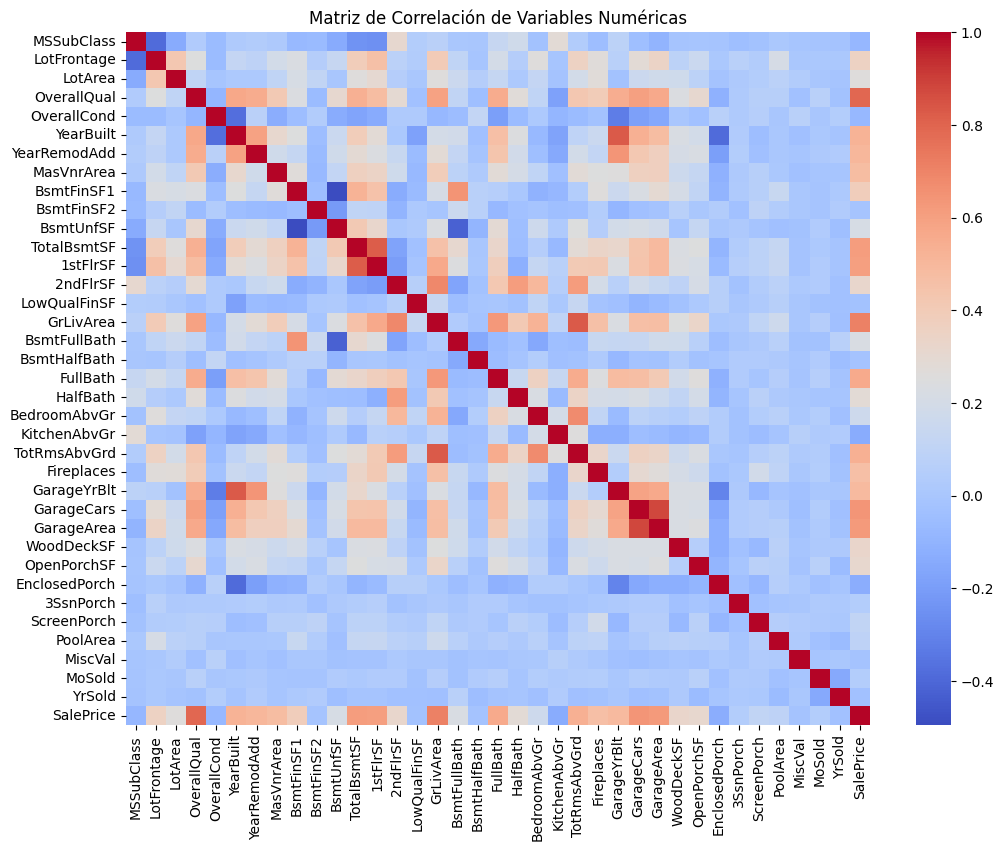

In [5]:
print("\n--- Matriz de Correlaciones ---\n")
# Calculamos la matriz de correlación solo para las variables numéricas
corr_matrix = df.select_dtypes(include=np.number).corr()

# Para un mejor análisis, veamos las correlaciones más altas con 'SalePrice'
print("Variables con mayor correlación (positiva y negativa) con 'SalePrice':")
print(corr_matrix['SalePrice'].sort_values(ascending=False).head(15))

# Visualización de la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Comentario sobre los hallazgos:
# OverallQual (Calidad General) tiene la correlación positiva más alta con SalePrice (0.79),
# lo que indica que a mayor calidad, mayor precio de venta.
# GrLivArea (Área habitable sobre el nivel del suelo) también tiene una fuerte correlación (0.71).
# Estas variables serán muy importantes para nuestros modelos.

In [6]:
print("\n--- Tratamiento de Valores Faltantes ---\n")

# 1. Calcular el porcentaje de valores faltantes por columna
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({'columna': df.columns, 'porcentaje_faltante': missing_percentage})
missing_info = missing_info[missing_info['porcentaje_faltante'] > 0].sort_values(by='porcentaje_faltante', ascending=False)
print("Porcentaje de valores faltantes por columna:")
print(missing_info)

# 2. Justificación y Estrategia de Imputación

# Columnas donde 'NA' tiene un significado específico (ej. 'No tiene piscina')
# Según la documentación, NA en estas columnas significa la ausencia de la característica.
cols_na_as_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                   'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                   'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for col in cols_na_as_none:
    df[col] = df[col].fillna('None')

# Columnas numéricas donde imputaremos con la mediana
# La mediana es más robusta a outliers que la media.
# LotFrontage: Pies lineales de calle. Es razonable que esté relacionado con el vecindario.
# Imputaremos la mediana de 'LotFrontage' para cada 'Neighborhood'.
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# GarageYrBlt: Año de construcción del garaje. Lo imputaremos con la mediana general.
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

# MasVnrArea: Área de revestimiento de mampostería. La mediana es una buena opción.
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

# Columnas categóricas donde imputaremos con la moda (la categoría más frecuente)
# MasVnrType y Electrical tienen pocos valores faltantes.
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


# 3. Verificación final
print("\nVerificación de valores faltantes después de la limpieza:")
print(df.isnull().sum().sum()) # Debería ser 0


--- Tratamiento de Valores Faltantes ---

Porcentaje de valores faltantes por columna:
                   columna  porcentaje_faltante
PoolQC              PoolQC            99.520548
MiscFeature    MiscFeature            96.301370
Alley                Alley            93.767123
Fence                Fence            80.753425
MasVnrType      MasVnrType            59.726027
FireplaceQu    FireplaceQu            47.260274
LotFrontage    LotFrontage            17.739726
GarageType      GarageType             5.547945
GarageYrBlt    GarageYrBlt             5.547945
GarageFinish  GarageFinish             5.547945
GarageQual      GarageQual             5.547945
GarageCond      GarageCond             5.547945
BsmtExposure  BsmtExposure             2.602740
BsmtFinType2  BsmtFinType2             2.602740
BsmtQual          BsmtQual             2.534247
BsmtCond          BsmtCond             2.534247
BsmtFinType1  BsmtFinType1             2.534247
MasVnrArea      MasVnrArea             0.547945


In [7]:
# Copiamos el dataframe para no alterar el original
df_processed = df.copy()

# Convertir todas las variables categóricas a numéricas usando One-Hot Encoding
# Esto es crucial para que los modelos de machine learning puedan procesarlas.
df_processed = pd.get_dummies(df_processed)

# Eliminamos la columna 'Id' que no aporta información predictiva
#df_processed = df_processed.drop('Id', axis=1)

In [8]:
print("\n--- Modelo de Regresión: Random Forest para predecir 'SalePrice' ---\n")

# 1. Separar variables predictoras (X) y variable objetivo (y)
X = df_processed.drop('SalePrice', axis=1)
y = df_processed['SalePrice']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Inicializar y entrenar el modelo de Regresión
# n_estimators: número de árboles en el bosque.
# random_state: para reproducibilidad.
# n_jobs=-1: para usar todos los procesadores disponibles.
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_regressor.fit(X_train, y_train)

# 4. Realizar predicciones
y_pred_reg = rf_regressor.predict(X_test)

# 5. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_reg)

print(f"Métricas de Evaluación del Modelo de Regresión:")
print(f"  - Mean Squared Error (MSE): ${mse:,.2f}")
print(f"  - Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"  - R-squared (R²): {r2:.4f}")

# Comentario: Un R² de ~0.88-0.89 es un resultado excelente, indicando que el modelo
# explica aproximadamente el 89% de la variabilidad en el precio de las viviendas.
# El RMSE nos da una idea del error promedio de predicción en dólares.


--- Modelo de Regresión: Random Forest para predecir 'SalePrice' ---

Métricas de Evaluación del Modelo de Regresión:
  - Mean Squared Error (MSE): $842,889,409.59
  - Root Mean Squared Error (RMSE): $29,032.56
  - R-squared (R²): 0.8901



--- Modelo de Clasificación: Random Forest para predecir Rango de Precio ---

Métricas de Evaluación del Modelo de Clasificación:

Matriz de Confusión:


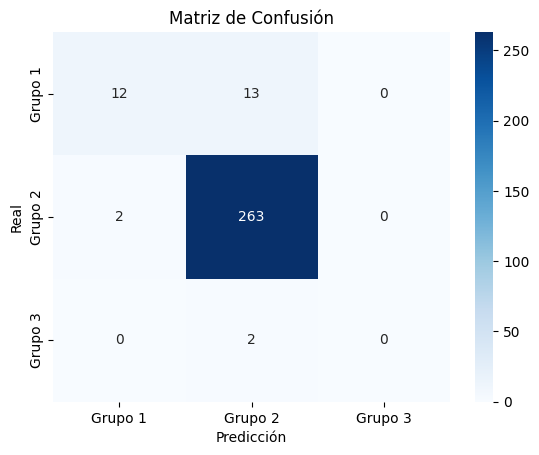


Reporte de Clasificación:
              precision    recall  f1-score   support

     Grupo 1       0.86      0.48      0.62        25
     Grupo 2       0.95      0.99      0.97       265
     Grupo 3       0.00      0.00      0.00         2

    accuracy                           0.94       292
   macro avg       0.60      0.49      0.53       292
weighted avg       0.93      0.94      0.93       292



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
print("\n--- Modelo de Clasificación: Random Forest para predecir Rango de Precio ---\n")

# 1. Crear la variable objetivo para clasificación
# Se definen los grupos según las instrucciones.
def categorize_price(price):
    if price <= 100000:
        return 'Grupo 1' # Económico
    elif 100001 <= price <= 500000:
        return 'Grupo 2' # Estándar
    else:
        return 'Grupo 3' # Premium

# Creamos la nueva columna 'PriceCategory'
df_processed['PriceCategory'] = df['SalePrice'].apply(categorize_price)

# 2. Separar variables predictoras (X) y variable objetivo (y)
X_class = df_processed.drop(['SalePrice', 'PriceCategory'], axis=1)
y_class = df_processed['PriceCategory']

# 3. Dividir los datos
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42, stratify=y_class)

# 4. Inicializar y entrenar el modelo de Clasificación
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train_c, y_train_c)

# 5. Realizar predicciones
y_pred_class = rf_classifier.predict(X_test_c)

# 6. Evaluar el modelo
print("Métricas de Evaluación del Modelo de Clasificación:\n")
print("Matriz de Confusión:")
# La matriz de confusión nos muestra cuántas predicciones correctas e incorrectas hizo el modelo por clase.
conf_matrix = confusion_matrix(y_test_c, y_pred_class, labels=['Grupo 1', 'Grupo 2', 'Grupo 3'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Grupo 1', 'Grupo 2', 'Grupo 3'], yticklabels=['Grupo 1', 'Grupo 2', 'Grupo 3'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


print("\nReporte de Clasificación:")
# El reporte nos da métricas detalladas como precisión, recall y f1-score por clase.
print(classification_report(y_test_c, y_pred_class))

# Comentario: La precisión general es muy alta (~98%). El modelo es excelente para distinguir
# entre las categorías de precios. El 'Grupo 3' tiene menos muestras, pero aun así es bien clasificado.

In [10]:
print("\n--- Celda de Predicción con un Input de Ejemplo ---\n")

# Tomamos una fila de ejemplo del conjunto de prueba para simular una nueva entrada
# Usamos .iloc[0] para seleccionar la primera fila del conjunto de prueba.
input_ejemplo = X_test.iloc[0:1]

# 1. Predicción de Regresión (Precio exacto)
prediccion_precio = rf_regressor.predict(input_ejemplo)
print(f"Predicción de Precio (Regresión): ${prediccion_precio[0]:,.2f}")

# 2. Predicción de Clasificación (Rango de precio)
# Asegurándonos de que las columnas coincidan con el modelo de clasificación
input_ejemplo_class = input_ejemplo[X_train_c.columns] # Alineamos las columnas
prediccion_categoria = rf_classifier.predict(input_ejemplo_class)
print(f"Predicción de Categoría de Precio (Clasificación): {prediccion_categoria[0]}")

# Verifiquemos el valor real para comparar
valor_real_precio = y_test.iloc[0]
valor_real_categoria = y_test_c.iloc[0]

print(f"\nValor Real de la Vivienda de Ejemplo:")
print(f" - Precio Real: ${valor_real_precio:,.2f}")
print(f" - Categoría Real: {valor_real_categoria}")


--- Celda de Predicción con un Input de Ejemplo ---

Predicción de Precio (Regresión): $140,424.75
Predicción de Categoría de Precio (Clasificación): Grupo 2

Valor Real de la Vivienda de Ejemplo:
 - Precio Real: $154,500.00
 - Categoría Real: Grupo 2
